In [ ]:
# %tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Batch Normalization

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding batch normalization layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Dataset.zip

Archive:  /content/drive/MyDrive/Dataset.zip
replace Dataset/emergency_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [ ]:
# create random number generator
seed = 42

In [ ]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [ ]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [ ]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Without Batch Normalization</ol>

In [ ]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Compiling the model

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [ ]:
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=1, batch_size=128,validation_data=(X_valid,y_valid))

13/13 [==============================] - 9s 182ms/step - loss: 0.7099 - accuracy: 0.5207 - val_loss: 0.7096 - val_accuracy: 0.5609


## 7. Evaluating model performance

In [ ]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred < 0.5, 0, 1)

23/23 [==============================] - 0s 11ms/step


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.5609065155807366 %


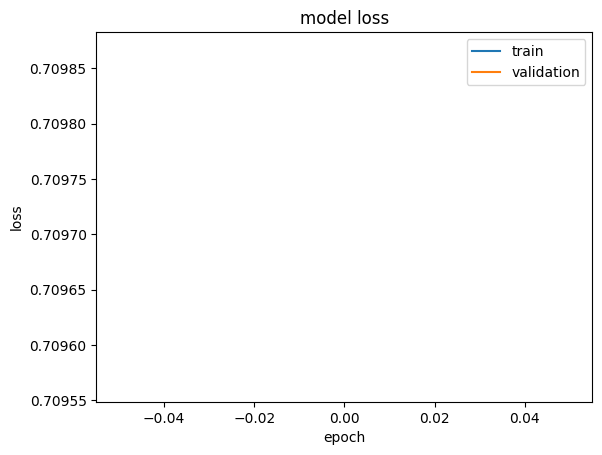

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Defining the model architecture

### <ol>With Batch Normalization</ol>

In [ ]:
# importing batch normalization layer
from keras.layers import BatchNormalization

In [ ]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063501 (57.46 MB)
Trainable params: 15063301 (57.46 MB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


## Compiling the model

In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## Training the model

In [ ]:
# training the model for 50 epochs using Batch Normalization
model_history = model.fit(X_train, y_train, epochs=1, batch_size=128,validation_data=(X_valid,y_valid))

## Evaluating model performance

In [ ]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred < 0.5, 0, 1)

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()